<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

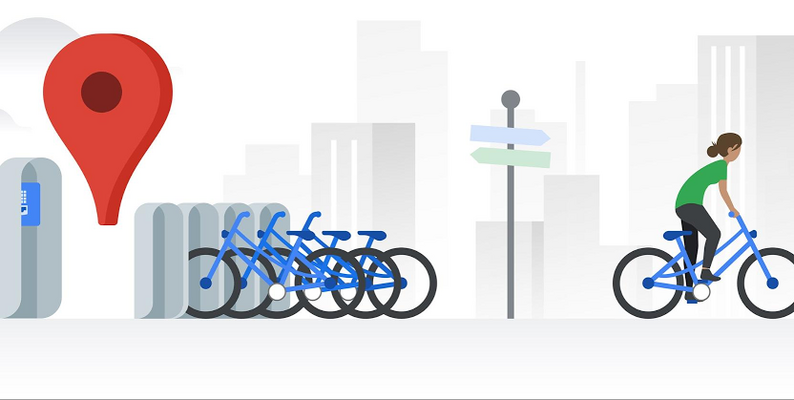

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Load and Prepare Data

In [ ]:
df = pd.read_csv('./train.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.drop(['datetime'], axis=1, inplace=True)

## EDA

In [ ]:
plt.figure(figsize = (15, 10))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [ ]:
df.drop(['atemp', 'casual', 'registered'], axis=1, inplace=True)

In [ ]:
df.info()

## Data Preprocessing

In [ ]:
df.isna().sum()

## Strorytelling - Visualization

In [ ]:
sns.scatterplot(df['temp'])

In [ ]:
sns.scatterplot(df['windspeed'])

In [ ]:
# df.groupby('season').count()

## Train your model (Regression)

In [ ]:
season = pd.get_dummies(df['season'])
df = pd.concat([df,season],axis=1)
df.rename(columns={1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)
df.drop(['season', 'spring'], axis=1, inplace=True)

In [ ]:
weather = pd.get_dummies(df['weather'])
df = pd.concat([df, weather],axis=1)
df.rename(columns={1:'weather-1', 2:'weather-2', 3:'weather-3', 4:'weather-4'}, inplace=True)
df.drop(['weather', 'weather-1'], axis=1, inplace=True)

In [ ]:
df.sample(5)

In [ ]:
X = df.drop('count', axis=1)
y = df['count']

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)

## Test Result

In [ ]:
sns.histplot(y_test - y_pred)

In [ ]:
sns.scatterplot(y_test - y_pred)

In [ ]:
print('MAE (Mean Absolute Error):', metrics.mean_absolute_error(y_test, y_pred))
print('MSE (Mean Squared Error):', metrics.mean_squared_error(y_test, y_pred))
print('RMSE (Root Mean Squared Error):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
regressor.coef_

In [ ]:
regressor.intercept_